In [1]:
# Importing requires libraries
import warnings
warnings.filterwarnings('ignore')
# Pandas and numpty for dataset/array manipulation
import pandas as pd
import numpy as np

# Seaborn and Matplotlib for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Sklearn for Machine Laerning and Statistical Modelling
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [2]:
# Read the datasets into a pandas dataframe
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [3]:
# Display the first 10 rows of data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Information about the Dataframe including index dtype and columns, non-null value
train_df.info()

# Generate descriptive statistics of the dataset
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Lets have a look at the categorical features
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
def compute_survival_rate(df, column):
    # Create a pivot table to aggregate the counts of survived and not survived passengers
    pivot_table = df.pivot_table(
        values='PassengerId',
        index=column,
        columns='Survived',
        aggfunc='count',
        fill_value=0
    ).reset_index()

    # Rename columns for clarity
    pivot_table.columns = [column, 'not_survived', 'survived']

    # Calculate the total number of passengers for each category
    pivot_table['total_passengers'] = pivot_table['not_survived'] + pivot_table['survived']

    # Calculate the survival rate for each category
    pivot_table['survival_rate (%)'] = (pivot_table['survived'] / pivot_table['total_passengers'] * 100)

    # Display the result in markdown format
    print(pivot_table.to_markdown(index=False))

In [7]:
# Pivot table to track Pclass
compute_survival_rate(train_df, "Pclass")

|   Pclass |   not_survived |   survived |   total_passengers |   survival_rate (%) |
|---------:|---------------:|-----------:|-------------------:|--------------------:|
|        1 |             80 |        136 |                216 |             62.963  |
|        2 |             97 |         87 |                184 |             47.2826 |
|        3 |            372 |        119 |                491 |             24.2363 |


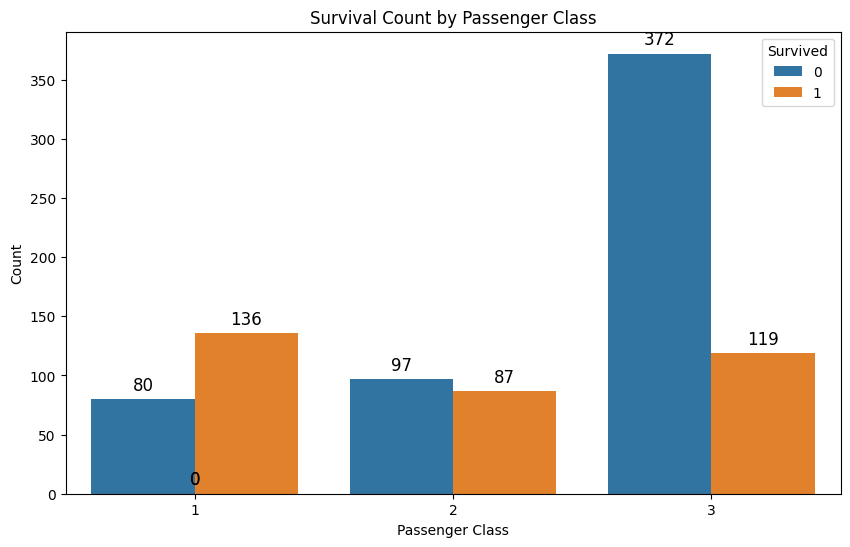

In [8]:
plt.figure(figsize=(10, 6))

# count plot for passenger class, coloured by survival status
pclass_plot = sns.countplot(x="Pclass", hue = "Survived", data = train_df)

for p in pclass_plot.patches:
    pclass_plot.annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 10), textcoords='offset points',
                         fontsize=12)

# Title of the plot, as well as x and y labels
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


In [9]:
# Pivot table to track Pclass
compute_survival_rate(train_df, "Sex")

| Sex    |   not_survived |   survived |   total_passengers |   survival_rate (%) |
|:-------|---------------:|-----------:|-------------------:|--------------------:|
| female |             81 |        233 |                314 |             74.2038 |
| male   |            468 |        109 |                577 |             18.8908 |


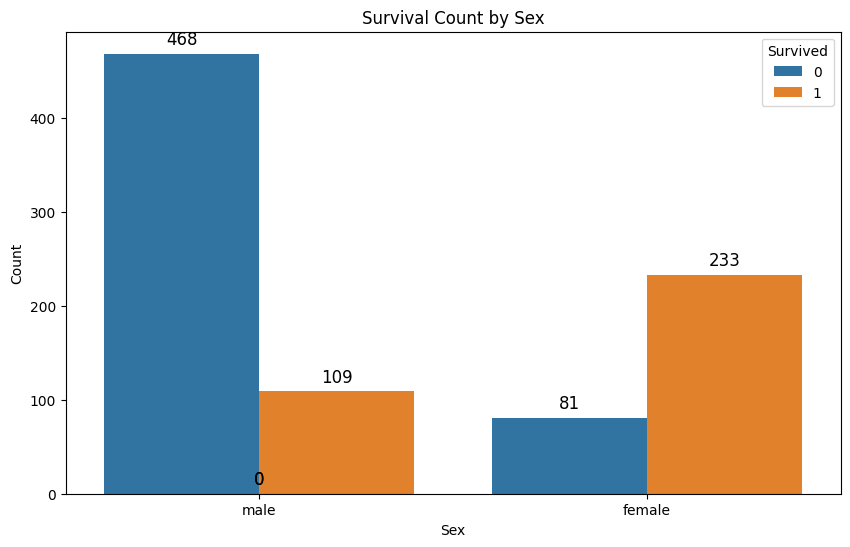

In [10]:
# Count plot for Sex
plt.figure(figsize=(10, 6))

# count plot for sex, coloured by survival status
pclass_plot = sns.countplot(x="Sex", hue = "Survived", data = train_df)

for p in pclass_plot.patches:
    pclass_plot.annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 10), textcoords='offset points',
                         fontsize=12)

# Title of the plot, as well as x and y labels
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

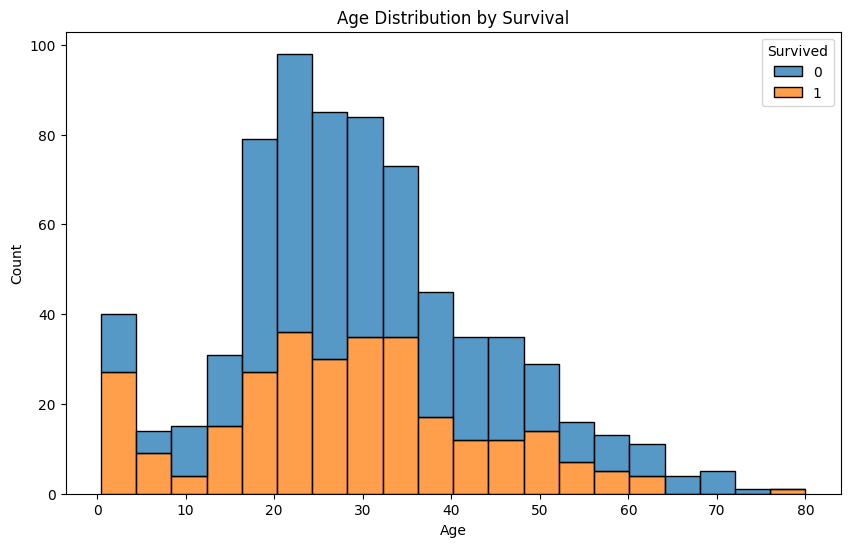

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', kde=False)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
compute_survival_rate(train_df, "SibSp")

|   SibSp |   not_survived |   survived |   total_passengers |   survival_rate (%) |
|--------:|---------------:|-----------:|-------------------:|--------------------:|
|       0 |            398 |        210 |                608 |             34.5395 |
|       1 |             97 |        112 |                209 |             53.5885 |
|       2 |             15 |         13 |                 28 |             46.4286 |
|       3 |             12 |          4 |                 16 |             25      |
|       4 |             15 |          3 |                 18 |             16.6667 |
|       5 |              5 |          0 |                  5 |              0      |
|       8 |              7 |          0 |                  7 |              0      |


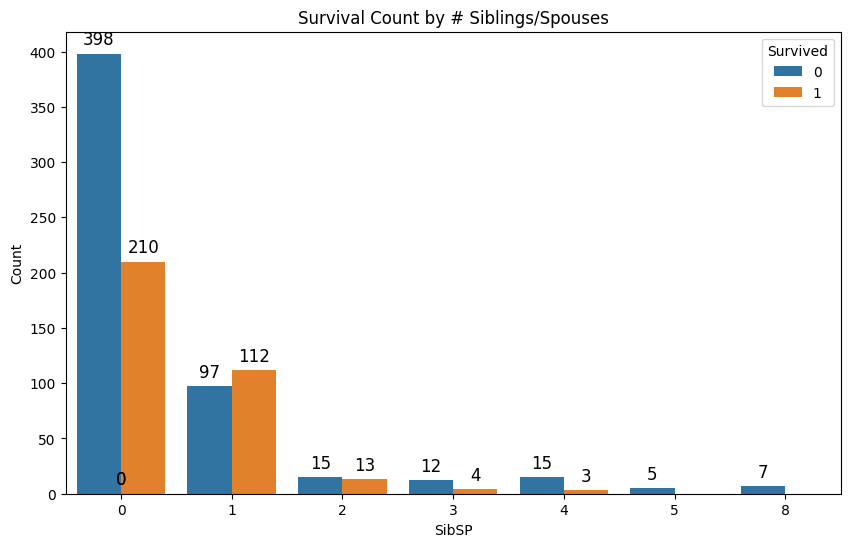

In [13]:
plt.figure(figsize=(10, 6))
embarked_plot = sns.countplot(x='SibSp', hue='Survived', data=train_df)

for p in embarked_plot.patches:
    embarked_plot.annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10),
                           textcoords='offset points',
                           fontsize=12)

plt.title('Survival Count by # Siblings/Spouses')
plt.xlabel('SibSP')
plt.ylabel('Count')
plt.show()

In [14]:
compute_survival_rate(train_df, "Parch")

|   Parch |   not_survived |   survived |   total_passengers |   survival_rate (%) |
|--------:|---------------:|-----------:|-------------------:|--------------------:|
|       0 |            445 |        233 |                678 |             34.3658 |
|       1 |             53 |         65 |                118 |             55.0847 |
|       2 |             40 |         40 |                 80 |             50      |
|       3 |              2 |          3 |                  5 |             60      |
|       4 |              4 |          0 |                  4 |              0      |
|       5 |              4 |          1 |                  5 |             20      |
|       6 |              1 |          0 |                  1 |              0      |


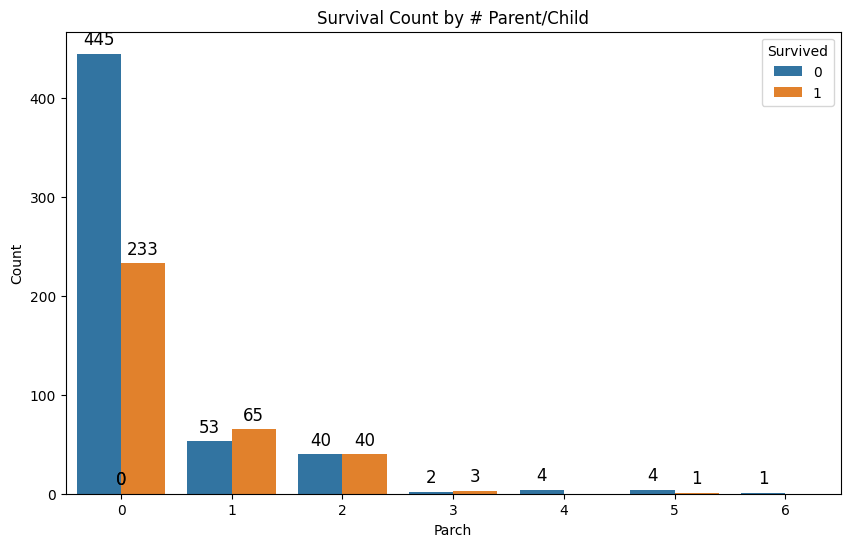

In [15]:
plt.figure(figsize=(10, 6))
embarked_plot = sns.countplot(x='Parch', hue='Survived', data=train_df)

for p in embarked_plot.patches:
    embarked_plot.annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10),
                           textcoords='offset points',
                           fontsize=12)

plt.title('Survival Count by # Parent/Child')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

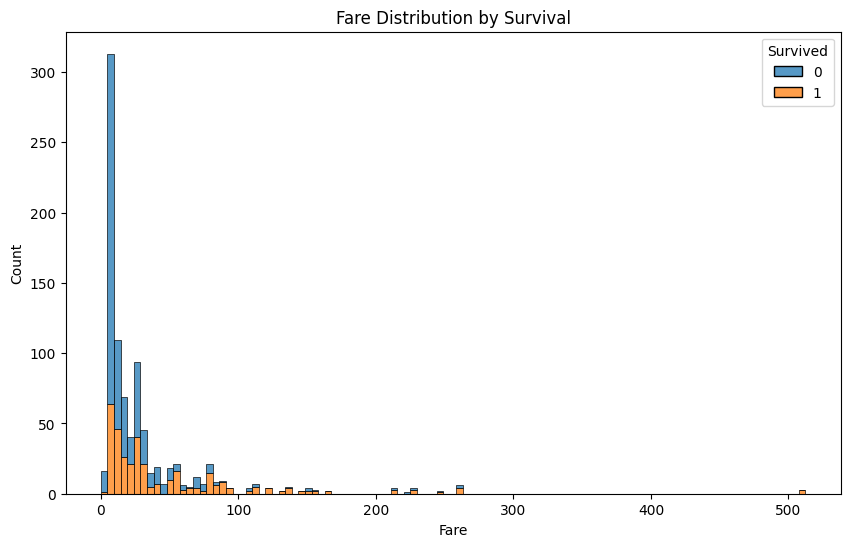

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x="Fare", hue ="Survived", multiple="stack", kde=False)
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

In [17]:
compute_survival_rate(train_df, "Embarked")

| Embarked   |   not_survived |   survived |   total_passengers |   survival_rate (%) |
|:-----------|---------------:|-----------:|-------------------:|--------------------:|
| C          |             75 |         93 |                168 |             55.3571 |
| Q          |             47 |         30 |                 77 |             38.961  |
| S          |            427 |        217 |                644 |             33.6957 |


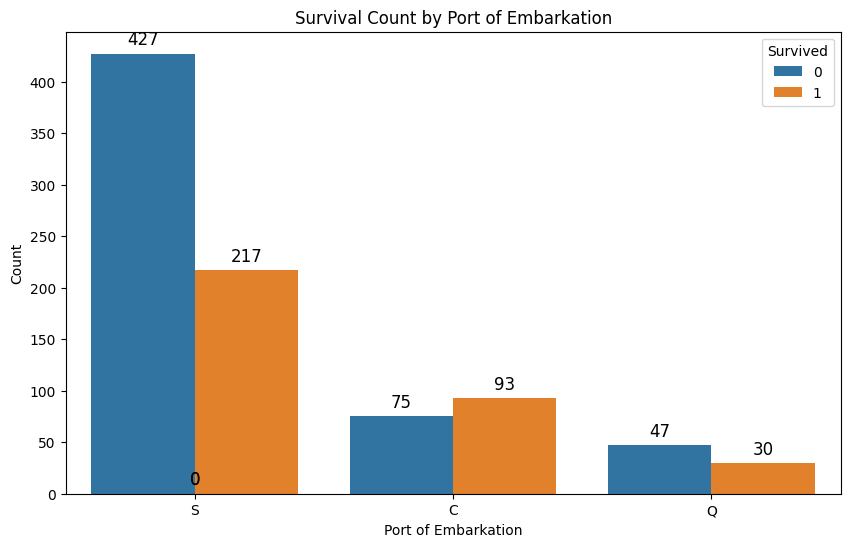

In [18]:
plt.figure(figsize=(10, 6))
embarked_plot = sns.countplot(x='Embarked', hue='Survived', data=train_df)

for p in embarked_plot.patches:
    embarked_plot.annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10),
                           textcoords='offset points',
                           fontsize=12)

plt.title('Survival Count by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()


**Data Cleansing & Feature Engineering**

In [19]:
print(train_df.isnull().sum())
print("-" * 20)
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
train_df['Cabin_Assigned'] = train_df['Cabin'].notnull().astype(int)
test_df['Cabin_Assigned'] = test_df['Cabin'].notnull().astype(int)
compute_survival_rate(train_df, "Cabin_Assigned")

|   Cabin_Assigned |   not_survived |   survived |   total_passengers |   survival_rate (%) |
|-----------------:|---------------:|-----------:|-------------------:|--------------------:|
|                0 |            481 |        206 |                687 |             29.9854 |
|                1 |             68 |        136 |                204 |             66.6667 |


In [21]:
# Dropping cabin as we dont need it anymore
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

In [22]:
# replace missing embarked values with S
train_df = train_df.fillna({"Embarked": "S"})

In [23]:
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [24]:
# Replace titles with more common names, for both training and test set
train_df['Title'] = train_df['Title'].replace({
    'Lady' : 'Rare',
    'Capt' : 'Rare',
    'Col' : 'Rare',
    'Don' : 'Rare',
    'Dr' : 'Rare',
    'Major' : 'Rare',
    'Rev' : 'Rare',
    'Jonkheer' : 'Rare',
    'Dona' : 'Rare',
    'Countess' : 'Royal',
    'Lady' : 'Royal',
    'Sir' : 'Royal',
    'Mlle' : 'Miss',
    'Ms' : 'Miss',
    'Mme' : 'Mrs',})

test_df['Title'] = test_df['Title'].replace({
    'Lady' : 'Rare',
    'Capt' : 'Rare',
    'Col' : 'Rare',
    'Don' : 'Rare',
    'Dr' : 'Rare',
    'Major' : 'Rare',
    'Rev' : 'Rare',
    'Jonkheer' : 'Rare',
    'Dona' : 'Rare',
    'Countess' : 'Royal',
    'Lady' : 'Royal',
    'Sir' : 'Royal',
    'Mlle' : 'Miss',
    'Ms' : 'Miss',
    'Mme' : 'Mrs',})

In [25]:
# Creating a feature for Family Size (for both data sets)
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + train_df['Parch'] + 1

train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + train_df['Parch'] + 1

In [26]:
# Creating a feature that tracks if a person was travelling alone or not
train_df['isAlone'] = train_df['Family_Size'] == 1
test_df['isAlone'] = test_df['Family_Size'] == 1

# Convert boolean to integer (optional, for model compatibility)
train_df['isAlone'] = train_df['isAlone'].astype(int)
test_df['isAlone'] = test_df['isAlone'].astype(int)

In [27]:
# Lets start converting categorical variables into numerical

# Embarked to Numerical
train_df['Embarked'] = train_df['Embarked'].map({'C':0, 'Q':1, 'S': 2})
test_df['Embarked'] = test_df['Embarked'].map({'C':0, 'Q':1, 'S': 2})

# Sex to Numerical
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})

# Titles to Numerical
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
train_df['Title'] = train_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].map(title_mapping)

In [28]:
train_df['Age_Group'] = pd.qcut(train_df['Age'], 5)
test_df['Age_Group'] = pd.qcut(test_df['Age'], 5)

train_df[['Age_Group', 'Survived']].groupby(['Age_Group'], as_index=False).mean().sort_values(by='Age_Group', ascending=True)

,Age_Group,Survived
0,"(0.419, 19.0]",0.481707
1,"(19.0, 25.0]",0.328467
2,"(25.0, 31.8]",0.393701
3,"(31.8, 41.0]",0.437500
4,"(41.0, 80.0]",0.373239


In [29]:
train_df.loc[train_df['Age'] <= 19, 'Age'] = 0
train_df.loc[(train_df['Age'] > 19) & (train_df['Age'] <= 25), 'Age'] = 1
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 31), 'Age'] = 2
train_df.loc[(train_df['Age'] > 31) & (train_df['Age'] <= 41), 'Age'] = 3
train_df.loc[(train_df['Age'] > 41) & (train_df['Age'] <= 80), 'Age'] = 4
train_df.loc[train_df['Age'] > 80, 'Age']

test_df.loc[test_df['Age'] <= 19, 'Age'] = 0
test_df.loc[(test_df['Age'] > 19) & (train_df['Age'] <= 25), 'Age'] = 1
test_df.loc[(test_df['Age'] > 25) & (train_df['Age'] <= 31), 'Age'] = 2
test_df.loc[(test_df['Age'] > 31) & (train_df['Age'] <= 41), 'Age'] = 3
test_df.loc[(test_df['Age'] > 41) & (train_df['Age'] <= 80), 'Age'] = 4
test_df.loc[test_df['Age'] > 80, 'Age']

Series([], Name: Age, dtype: float64)

In [30]:
# fill in missing Age values in both train and test dataset
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Assigned,Title,Family_Size,isAlone,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,2,0,1,2,0,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,0,1,3,2,0,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,2,0,2,1,1,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,2,1,3,2,0,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,2,0,1,1,1,"(31.8, 41.0]"


In [32]:
train_df['Fare_Band'] = pd.qcut(train_df['Fare'], 4)
test_df['Fare_Band'] = pd.qcut(test_df['Fare'], 4)

In [33]:
train_df[['Fare_Band', 'Survived']].groupby(['Fare_Band'], as_index=False).mean().sort_values(by='Fare_Band', ascending=True)

,Fare_Band,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [34]:
train_df.loc[train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare'] = 2
train_df.loc[train_df['Fare'] > 31, 'Fare'] = 3

test_df.loc[test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare'] = 2
test_df.loc[test_df['Fare'] > 31, 'Fare'] = 3

In [35]:
# Fill in the missing Fare value in the test Dataset
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [36]:
# Convert all columns to int64 values
float_train_cols = train_df.select_dtypes(include=['float64']).columns
train_df[float_train_cols] = train_df[float_train_cols].astype('int64')

float_test_cols = test_df.select_dtypes(include=['float64']).columns
test_df[float_test_cols] = test_df[float_test_cols].astype('int64')

In [37]:
# Finally lets drop the columns that we dont need anymore
train_df = train_df.drop(['Fare_Band', 'Age_Group', 'Name', 'Ticket'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Assigned,Title,Family_Size,isAlone
0,1,0,3,0,1,1,0,0,2,0,1,2,0
1,2,1,1,1,3,1,0,3,0,1,3,2,0
2,3,1,3,1,2,0,0,1,2,0,2,1,1
3,4,1,1,1,3,1,0,3,2,1,3,2,0
4,5,0,3,0,3,0,0,1,2,0,1,1,1


In [38]:
test_df = test_df.drop(['Fare_Band', 'Age_Group', 'Name', 'Ticket'], axis=1)
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Assigned,Title,Family_Size,isAlone
0,892,3,0,1,0,0,0,1,0,1,1,1
1,893,3,1,1,1,0,0,2,0,3,2,0
2,894,2,0,1,0,0,1,1,0,1,1,1
3,895,3,0,1,0,0,1,2,0,1,1,1
4,896,3,1,1,1,1,1,2,0,3,2,0
5,897,3,0,0,0,0,1,2,0,1,1,1
6,898,3,1,1,0,0,0,1,0,2,1,1
7,899,2,0,1,1,1,2,2,0,1,3,0
8,900,3,1,0,0,0,0,0,0,3,3,0
9,901,3,0,1,2,0,2,2,0,1,3,0


### **New Section**

In [39]:
# Well start by splitting our training data to test the accuracy of each model
predictors = train_df.drop(['Survived', 'PassengerId'], axis=1)
target = train_df["Survived"]
X_train, X_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [40]:
#Initisalise Logistic Regression model
log_reg = LogisticRegression()

# Train the logistic Regression model on the training data
log_reg.fit(X_train, y_train)

# Use the model to predict the labels for the validation set
y_pred = log_reg.predict(X_val)

# calculate the accuracy
log_acc = round(accuracy_score(y_pred, y_val)*100, 2)
print(log_acc)

79.7


In [41]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
svc_acc = round(accuracy_score(y_pred, y_val)*100, 2)
print(svc_acc)

81.73


In [42]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)
rfc_acc = round(accuracy_score(y_pred, y_val)*100, 2)
print(rfc_acc)

83.76


In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
knn_acc = round(accuracy_score(y_pred, y_val)*100, 2)
print(knn_acc)

80.71


In [44]:
guassian = GaussianNB()
guassian.fit(X_train, y_train)
y_pred = guassian.predict(X_val)
guassian_acc = round(accuracy_score(y_pred, y_val)*100,2)
print(guassian_acc)

77.66


In [45]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_val)
gbc_acc = round(accuracy_score(y_pred, y_val)*100, 2)
print(gbc_acc)

82.23


In [46]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_val)
dtc_acc = round(accuracy_score(y_pred, y_val)*100,2)
print(dtc_acc)

77.66


In [47]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_val)
perceptron_acc = round(accuracy_score(y_pred, y_val)*100, 2)
print(perceptron_acc)

76.65


In [48]:
sgc = SGDClassifier()
sgc.fit(X_train, y_train)
y_pred = sgc.predict(X_val)
sgc_acc = round(accuracy_score(y_pred, y_val)*100,2)
print(sgc_acc)

80.71


In [49]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector machines', 'Random Forest Classifier',
              'K-Nearest Neighbour', ' Guassian Naive Bayes', 'Gradient Boosting Glassifier',
              'Decision Tree', 'Perceptron', 'Stoachstic Gradient Descent'],
    'Score': [log_acc, svc_acc, rfc_acc, knn_acc, guassian_acc,
              gbc_acc, dtc_acc, perceptron_acc, sgc_acc]
            })
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest Classifier,83.76
5,Gradient Boosting Glassifier,82.23
1,Support Vector machines,81.73
3,K-Nearest Neighbour,80.71
8,Stoachstic Gradient Descent,80.71
0,Logistic Regression,79.70
4,Guassian Naive Bayes,77.66
6,Decision Tree,77.66
7,Perceptron,76.65


In [50]:
predictions = rfc.predict(test_df.drop('PassengerId', axis=1))
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)